In [1]:
#import library/packages 
from keras.models import Sequential
from keras.layers import Embedding
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

In [2]:
target_names = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True, categories=target_names)

In [3]:
x = newsgroups_train.data
y = newsgroups_train.target

In [ ]:
for i in range(11):
  print(x[i])

In [29]:
#tokenizing data 
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(x)
#getting the vocabulary of data
#sentences = tokenizer.texts_to_matrix(sentences)

In [7]:
#preparing data for embedding layer
max_review_len = max([len(s.split()) for s in x])
vocab_size = len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(x)
padded_docs = pad_sequences(sentences,maxlen=max_review_len)

In [46]:
le = preprocessing.LabelEncoder() #using label encoder to encode text data
y = le.fit_transform(y) #passing in my target label to encode 
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state = 1000) #traning data
X_train.shape,y_train.shape

((1525, 9168), (1525,))

In [47]:
#number of features 
input_dim = 9168
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))

model.add(Flatten())
model.add(layers.Dense(300, input_dim = input_dim,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [48]:
model.summary() #getting the summary of my model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 9168, 50)          1741550   
_________________________________________________________________
flatten_9 (Flatten)          (None, 458400)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               137520300 
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 301       
Total params: 139,262,151
Trainable params: 139,262,151
Non-trainable params: 0
_________________________________________________________________


In [49]:
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
6/6 [==============================] - 38s 6s/step - loss: -58.3039 - acc: 0.2720 - val_loss: -270.7722 - val_acc: 0.3124
Epoch 2/5
6/6 [==============================] - 36s 6s/step - loss: -382.1297 - acc: 0.2708 - val_loss: -735.8097 - val_acc: 0.3124
Epoch 3/5
6/6 [==============================] - 36s 6s/step - loss: -870.4702 - acc: 0.2796 - val_loss: -1450.1364 - val_acc: 0.3124
Epoch 4/5
6/6 [==============================] - 36s 6s/step - loss: -1795.8555 - acc: 0.2811 - val_loss: -2512.3621 - val_acc: 0.3124
Epoch 5/5
6/6 [==============================] - 35s 6s/step - loss: -2842.3599 - acc: 0.2768 - val_loss: -4017.5447 - val_acc: 0.3124


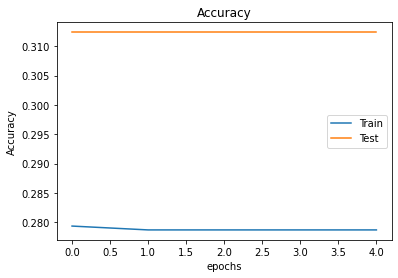

In [40]:
plt.figure()
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

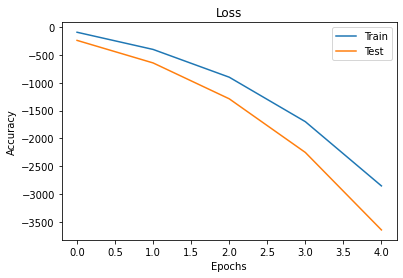

In [41]:
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()